# Demand Forecasting analysus for a Tennis Shop    
**Author:** Gonzalo Tano  

---

## Project Overview
This project focuses on forecasting daily product demand for the tennis shop, located in Georgia, USA.  
The dataset contains detailed sales records from **January 2023 to June 2025**, including product-level information such as price, promotions, customer type, weather, holidays, store traffic, and local tennis events.  

The main objectives are:
1. Clean and preprocess the dataset.  
2. Explore sales patterns, seasonality, and key drivers of demand.  
3. Build predictive models to forecast future sales.  

This notebook begins with **Phase 1: Data Collection & Preprocessing**.



In [11]:
# --- Phase 1: Data Collection & Preprocessing ---

# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

print("Libraries successfully imported.")



Libraries successfully imported.


## Step 1: Load and Inspect the Dataset
We begin by loading the dataset and performing an initial inspection to understand its size, data types, and structure.  
This dataset represents realistic daily sales for multiple product categories from 2023-2025.



In [12]:
# Load dataset
file_path = "sea_island_tennis_shop_sales_pro_v2.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,date,product_id,product_name,category,price,cost,on_promo,discount_pct,stock_on_hand_end,sales_qty,revenue,cogs,margin,customer_type,weather_temp_f,is_weekend,is_holiday,event_name,store_traffic
0,2023-01-01,101,Pro Staff V14 Racket,Rackets,269.99,161.99,0,0.00,39,1,269.99,161.99,108.00,Guest,64.30,1,1,NaN,239
1,2023-01-02,101,Pro Staff V14 Racket,Rackets,269.99,161.99,0,0.00,40,0,0.00,0.00,0.00,Member,62.60,0,0,NaN,163
2,2023-01-03,101,Pro Staff V14 Racket,Rackets,269.99,161.99,0,0.00,40,0,0.00,0.00,0.00,Guest,65.20,0,0,NaN,170
3,2023-01-04,101,Pro Staff V14 Racket,Rackets,269.99,161.99,0,0.00,39,1,269.99,161.99,108.00,Guest,68.10,0,0,NaN,159
4,2023-01-05,101,Pro Staff V14 Racket,Rackets,269.99,161.99,0,0.00,39,0,0.00,0.00,0.00,Member,63.00,0,0,NaN,164


In [13]:
# Dataset dimensions and general info
print(f"Dataset shape: {df.shape}")
print("\nDataset info:")
df.info()

# Statistical summary
df.describe(include='all').T


Dataset shape: (14592, 19)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14592 entries, 0 to 14591
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               14592 non-null  object 
 1   product_id         14592 non-null  int64  
 2   product_name       14592 non-null  object 
 3   category           14592 non-null  object 
 4   price              14592 non-null  float64
 5   cost               14592 non-null  float64
 6   on_promo           14592 non-null  int64  
 7   discount_pct       14592 non-null  float64
 8   stock_on_hand_end  14592 non-null  int64  
 9   sales_qty          14592 non-null  int64  
 10  revenue            14592 non-null  float64
 11  cogs               14592 non-null  float64
 12  margin             14592 non-null  float64
 13  customer_type      14592 non-null  object 
 14  weather_temp_f     14592 non-null  float64
 15  is_weekend         14592 non

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,14592,912,2023-01-01,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_id,"14,592.00",NaN,NaN,NaN,351.94,165.86,101.00,201.75,401.50,501.25,602.00
product_name,14592,16,Pro Staff V14 Racket,912,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,14592,6,Apparel,3648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,"14,592.00",NaN,NaN,NaN,81.79,91.86,2.24,6.99,31.74,139.99,269.99
cost,"14,592.00",NaN,NaN,NaN,49.03,57.74,1.30,3.50,15.63,92.39,161.99
on_promo,"14,592.00",NaN,NaN,NaN,0.11,0.31,0.00,0.00,0.00,0.00,1.00
discount_pct,"14,592.00",NaN,NaN,NaN,0.02,0.05,0.00,0.00,0.00,0.00,0.30
stock_on_hand_end,"14,592.00",NaN,NaN,NaN,170.08,134.00,26.00,57.00,104.00,278.00,454.00
sales_qty,"14,592.00",NaN,NaN,NaN,3.69,3.74,0.00,1.00,2.00,6.00,28.00


## Step 2: Review Data Quality
We will:
- Check for missing values.
- Standardize column names.
- Review duplicates.
- Inspect the data types to ensure consistency.


In [14]:
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check missing values
print("Missing Values per Column:\n")
print(df.isnull().sum())

# Check for duplicates
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")



Missing Values per Column:

date                     0
product_id               0
product_name             0
category                 0
price                    0
cost                     0
on_promo                 0
discount_pct             0
stock_on_hand_end        0
sales_qty                0
revenue                  0
cogs                     0
margin                   0
customer_type            0
weather_temp_f           0
is_weekend               0
is_holiday               0
event_name           13568
store_traffic            0
dtype: int64

Number of duplicate rows: 0


## Step 3: Convert Date Columns and Create Time Features
We’ll convert the `date` column to datetime format and extract useful time features  
such as **year**, **month**, and **day_of_week**, which will help analyze seasonal trends.



In [15]:
# Convert to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create derived features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.day_name()

# Preview
df[['date', 'year', 'month', 'day', 'day_of_week']].head()


,date,year,month,day,day_of_week
0,2023-01-01,2023,1,1,Sunday
1,2023-01-02,2023,1,2,Monday
2,2023-01-03,2023,1,3,Tuesday
3,2023-01-04,2023,1,4,Wednesday
4,2023-01-05,2023,1,5,Thursday


## Step 4: Handle Missing Values and Outliers
We will check again for missing data, replace them where necessary,  
and visualize potential outliers in numeric variables.



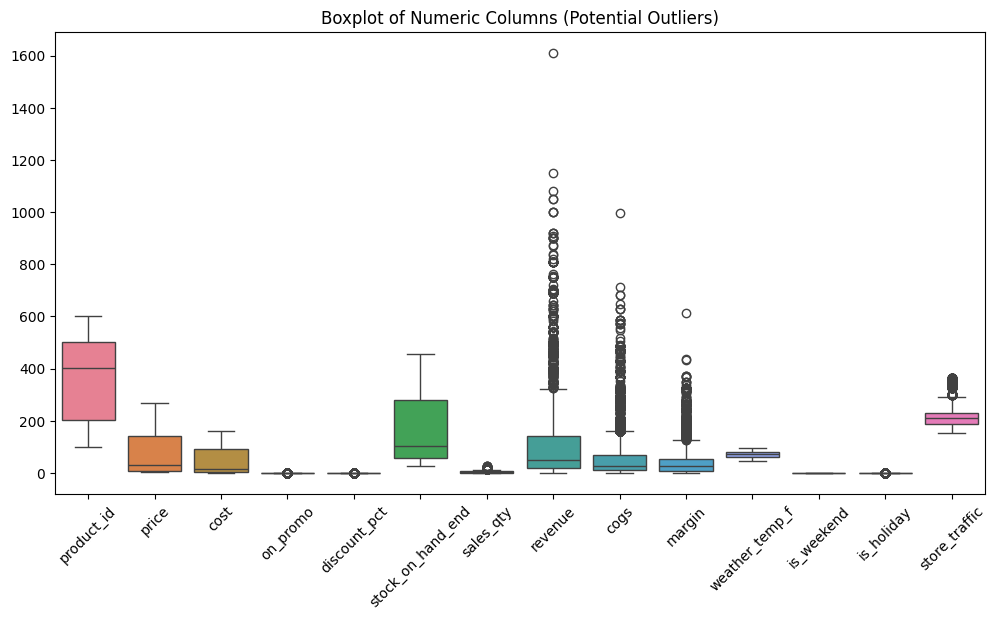

In [16]:
# Replace missing numeric values with median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot of Numeric Columns (Potential Outliers)")
plt.xticks(rotation=45)
plt.show()



## Step 5: Final Data Validation
Before saving the cleaned dataset, we’ll confirm:
- There are no missing or duplicated rows.
- All types and columns are consistent and usable for analysis.


In [17]:
# Final verification
print("Remaining Missing Values:")
print(df.isnull().sum())

# Save cleaned dataset
df.to_csv("sea_island_tennis_shop_clean_v2.csv", index=False)
print("\n Clean dataset successfully saved as 'sea_island_tennis_shop_clean_v2.csv'.")



Remaining Missing Values:
date                     0
product_id               0
product_name             0
category                 0
price                    0
cost                     0
on_promo                 0
discount_pct             0
stock_on_hand_end        0
sales_qty                0
revenue                  0
cogs                     0
margin                   0
customer_type            0
weather_temp_f           0
is_weekend               0
is_holiday               0
event_name           13568
store_traffic            0
year                     0
month                    0
day                      0
day_of_week              0
dtype: int64

 Clean dataset successfully saved as 'sea_island_tennis_shop_clean_v2.csv'.


# Phase 1 Summary: Data Collection & Preprocessing

 Loaded and inspected a realistic dataset (2023-2025).  
 Cleaned and standardized all column names and data types.  
 Created additional time features (year, month, weekday).  
 Handled missing values and visualized outliers.  
 Saved a clean dataset ready for **Exploratory Data Analysis (Phase 2)**.  

Next, we’ll move to **Phase 2: EDA**, where we will explore sales trends, seasonal patterns, and correlations.


# Phase 2 -- Exploratory Data Analysis (EDA)

In this phase, we will explore the sales data to uncover trends, patterns, and key insights  
about the Sea Island Tennis Shop’s performance between **January 2023 and June 2025**.

The main goals are to:
1. Understand sales trends over time.  
2. Compare performance by product category.  
3. Analyze customer behavior and traffic.  
4. Examine how promotions, events, and weather influence sales.  



In [18]:
# Load clean dataset from Phase 1
df = pd.read_csv("sea_island_tennis_shop_clean_v2.csv")

# Convert date again (for plotting)
df['date'] = pd.to_datetime(df['date'])

print(f"Dataset loaded successfully with {df.shape[0]:,} rows and {df.shape[1]} columns.")
df.head()


Dataset loaded successfully with 14,592 rows and 23 columns.


,date,product_id,product_name,category,price,cost,on_promo,discount_pct,stock_on_hand_end,sales_qty,revenue,cogs,margin,customer_type,weather_temp_f,is_weekend,is_holiday,event_name,store_traffic,year,month,day,day_of_week
0,2023-01-01,101,Pro Staff V14 Racket,Rackets,269.99,161.99,0,0.00,39,1,269.99,161.99,108.00,Guest,64.30,1,1,NaN,239,2023,1,1,Sunday
1,2023-01-02,101,Pro Staff V14 Racket,Rackets,269.99,161.99,0,0.00,40,0,0.00,0.00,0.00,Member,62.60,0,0,NaN,163,2023,1,2,Monday
2,2023-01-03,101,Pro Staff V14 Racket,Rackets,269.99,161.99,0,0.00,40,0,0.00,0.00,0.00,Guest,65.20,0,0,NaN,170,2023,1,3,Tuesday
3,2023-01-04,101,Pro Staff V14 Racket,Rackets,269.99,161.99,0,0.00,39,1,269.99,161.99,108.00,Guest,68.10,0,0,NaN,159,2023,1,4,Wednesday
4,2023-01-05,101,Pro Staff V14 Racket,Rackets,269.99,161.99,0,0.00,39,0,0.00,0.00,0.00,Member,63.00,0,0,NaN,164,2023,1,5,Thursday


## Step 1: Overall Sales Overview
We will start by summarizing total revenue, margin, and sales quantity.
This helps us understand the scale and performance of the shop over time.


In [19]:
# Aggregate metrics
total_revenue = df['revenue'].sum()
total_margin = df['margin'].sum()
avg_daily_sales = df.groupby('date')['revenue'].sum().mean()

print(f" Total Revenue: ${total_revenue:,.2f}")
print(f" Total Margin: ${total_margin:,.2f}")
print(f" Average Daily Revenue: ${avg_daily_sales:,.2f}")


 Total Revenue: $1,429,838.31
 Total Margin: $614,944.24
 Average Daily Revenue: $1,567.81


## Step 2: Monthly Revenue Trend
We’ll visualize how total revenue evolves over time to detect seasonality and growth patterns.


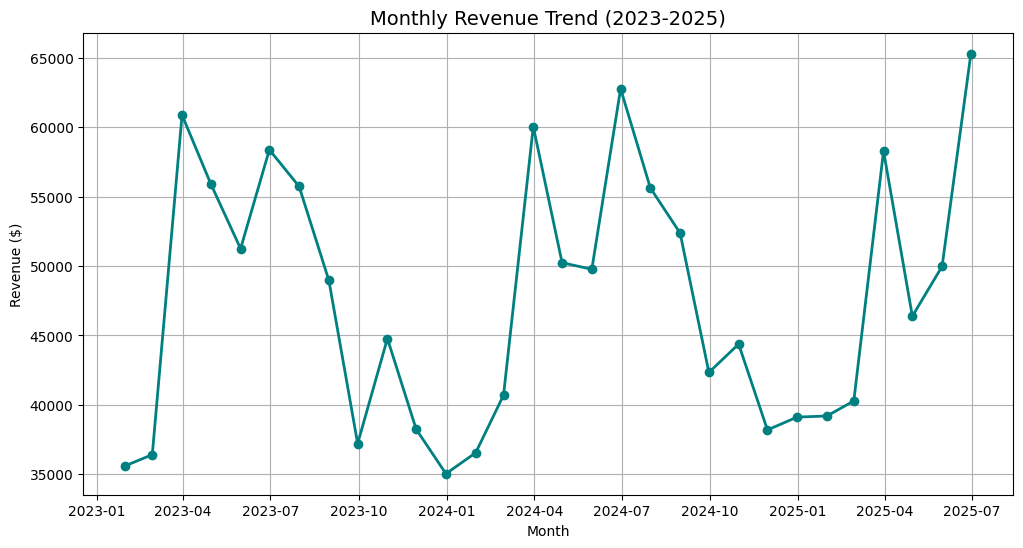

In [20]:
# Group by month
monthly_sales = df.groupby(pd.Grouper(key='date', freq='ME'))['revenue'].sum()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linewidth=2, color='teal')
plt.title("Monthly Revenue Trend (2023-2025)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.grid(True)
plt.show()


## Step 3: Revenue by Product Category
This chart shows which categories contribute the most to total revenue.
We expect **Rackets**, **Apparel**, and **Shoes** to dominate due to higher unit prices.


C:\Users\gonza\AppData\Local\Temp\ipykernel_2204\4283563492.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='crest', legend=False)


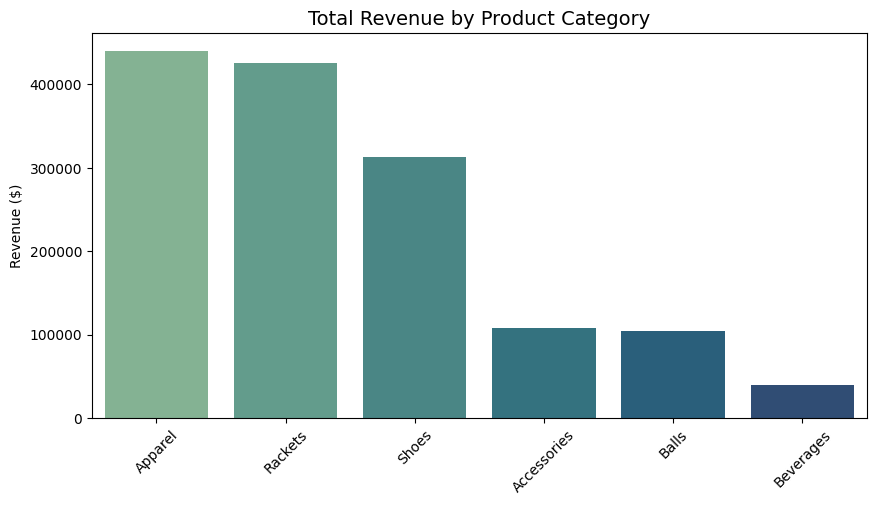

category
Apparel       439,451.03
Rackets       425,802.50
Shoes         312,398.43
Accessories   108,051.76
Balls         104,759.69
Beverages      39,374.90
Name: revenue, dtype: float64

In [21]:
category_sales = df.groupby('category')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='crest', legend=False)
plt.title("Total Revenue by Product Category", fontsize=14)
plt.ylabel("Revenue ($)")
plt.xlabel("")
plt.xticks(rotation=45)
plt.show()

category_sales


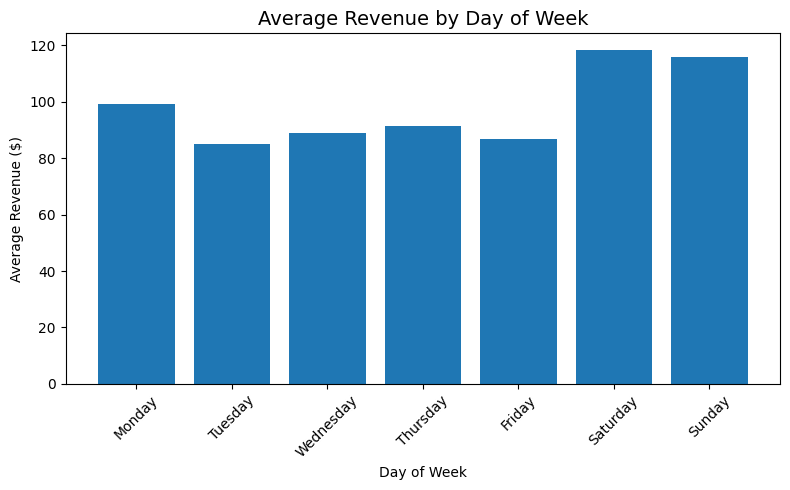

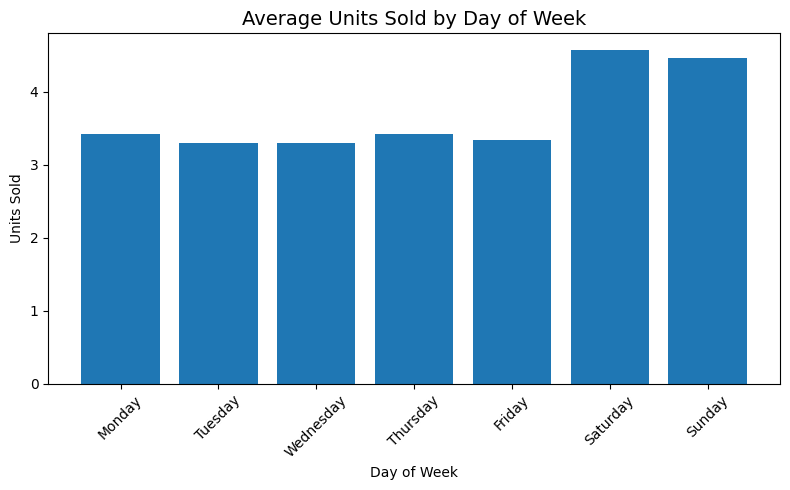

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("sea_island_tennis_shop_sales_pro_v2.csv")

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Create day of week feature
df['day_of_week'] = df['date'].dt.day_name()

# Order of days
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

# --- Chart 1: Average Revenue by Day ---
avg_revenue = df.groupby('day_of_week')['revenue'].mean().reindex(order)

plt.figure(figsize=(8,5))
plt.bar(avg_revenue.index, avg_revenue.values)
plt.title("Average Revenue by Day of Week", fontsize=14)
plt.ylabel("Average Revenue ($)")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Chart 2: Average Units Sold by Day ---
avg_units = df.groupby('day_of_week')['sales_qty'].mean().reindex(order)

plt.figure(figsize=(8,5))
plt.bar(avg_units.index, avg_units.values)
plt.title("Average Units Sold by Day of Week", fontsize=14)
plt.ylabel("Units Sold")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Step 4: Guest vs. Member Sales
Sea Island differentiates between **Guest** and **Member** customers.
We’ll compare their total revenue and average purchase behavior.


C:\Users\gonza\AppData\Local\Temp\ipykernel_2204\2601885820.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_sales.index, y=customer_sales.values, ax=ax[0], palette='pastel')
C:\Users\gonza\AppData\Local\Temp\ipykernel_2204\2601885820.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_avg.index, y=customer_avg.values, ax=ax[1], palette='muted')


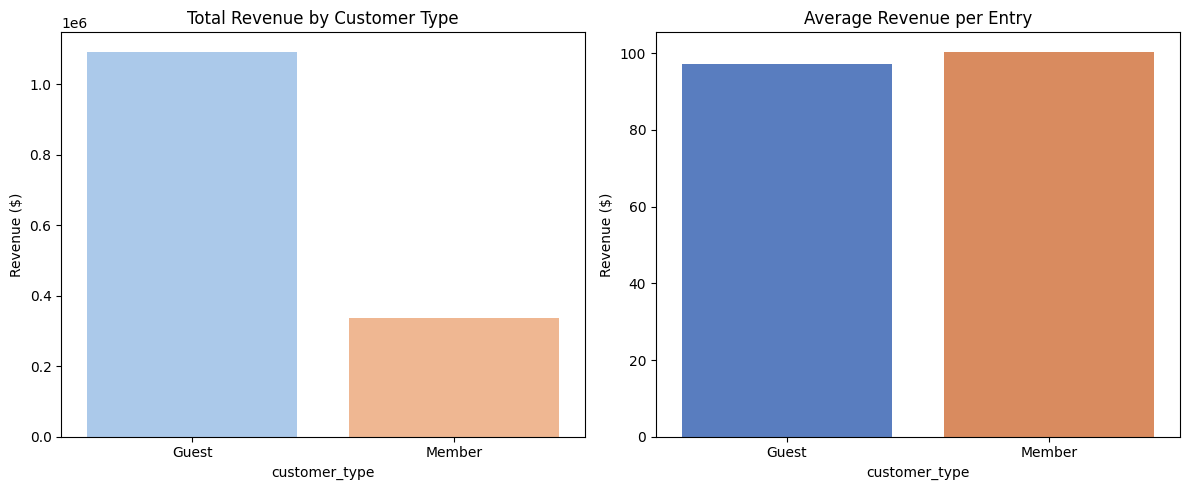

In [23]:
customer_sales = df.groupby('customer_type')['revenue'].sum().sort_values(ascending=False)
customer_avg = df.groupby('customer_type')['revenue'].mean()

fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Total revenue
sns.barplot(x=customer_sales.index, y=customer_sales.values, ax=ax[0], palette='pastel')
ax[0].set_title("Total Revenue by Customer Type")
ax[0].set_ylabel("Revenue ($)")

# Average transaction value
sns.barplot(x=customer_avg.index, y=customer_avg.values, ax=ax[1], palette='muted')
ax[1].set_title("Average Revenue per Entry")
ax[1].set_ylabel("Revenue ($)")

plt.tight_layout()
plt.show()



## Step 5: Relationship Between Weather and Sales
Since tennis is an outdoor sport, weather may influence both **store traffic** and **sales quantity**.
We’ll visualize how revenue varies with average daily temperature.


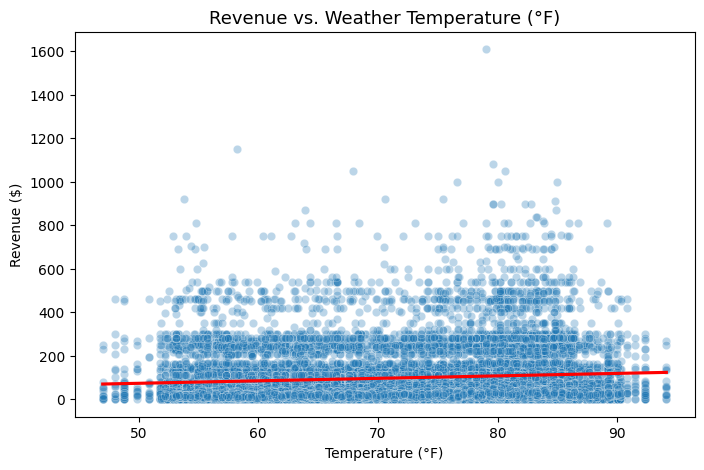

In [24]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='weather_temp_f', y='revenue', alpha=0.3)
sns.regplot(data=df, x='weather_temp_f', y='revenue', scatter=False, color='red')
plt.title("Revenue vs. Weather Temperature (°F)", fontsize=13)
plt.xlabel("Temperature (°F)")
plt.ylabel("Revenue ($)")
plt.show()


## Step 6: Event Impact on Sales
Sea Island hosts several annual tennis events (Spring Open, Junior Camp, Member-Guest, etc.).
We’ll measure how much revenue increases on event days compared to regular days.


C:\Users\gonza\AppData\Local\Temp\ipykernel_2204\2451930916.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_comparison.index, y=event_comparison.values, palette=['gray', 'gold'], legend=False)


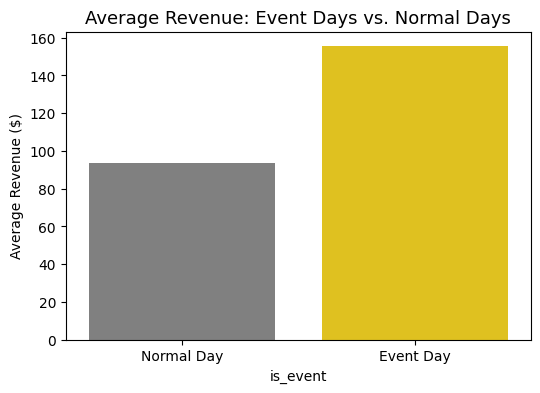

is_event
0    93.65
1   155.42
Name: revenue, dtype: float64


In [25]:
df['is_event'] = np.where(df['event_name'].notna(), 1, 0)
event_comparison = df.groupby('is_event')['revenue'].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=event_comparison.index, y=event_comparison.values, palette=['gray', 'gold'], legend=False)
plt.title("Average Revenue: Event Days vs. Normal Days", fontsize=13)
plt.xticks([0,1], ['Normal Day', 'Event Day'])
plt.ylabel("Average Revenue ($)")
plt.show()

print(event_comparison)


## Step 7: Correlation Heatmap
We’ll check correlations between numeric features (e.g., price, discount, traffic, weather, revenue).
This helps us identify which factors drive sales performance.


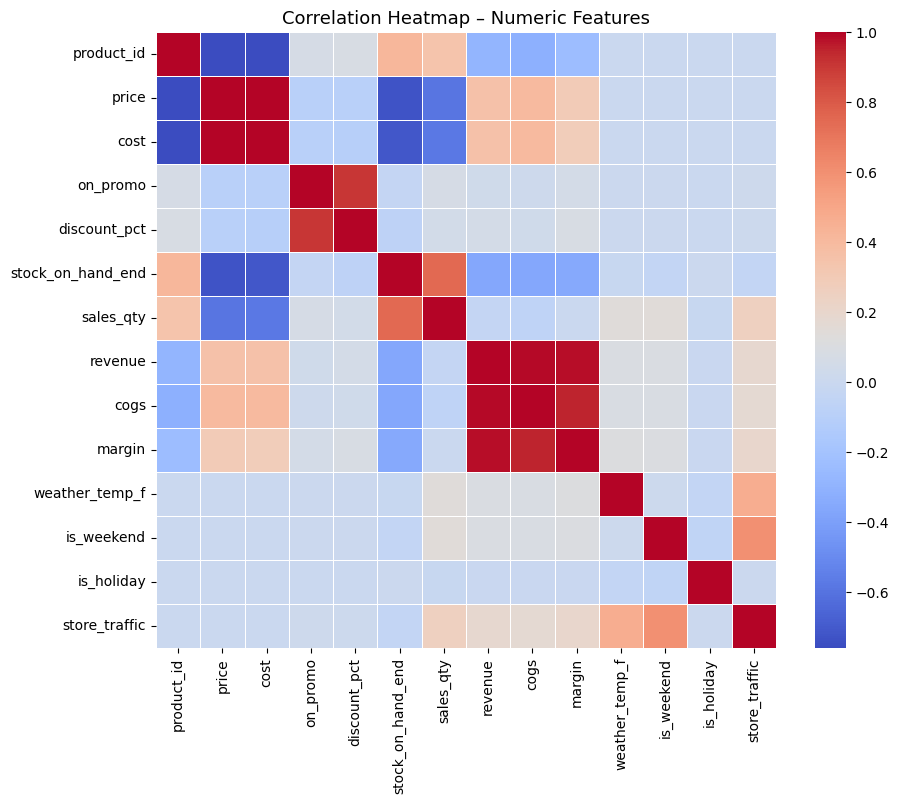

In [26]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap – Numeric Features", fontsize=13)
plt.show()


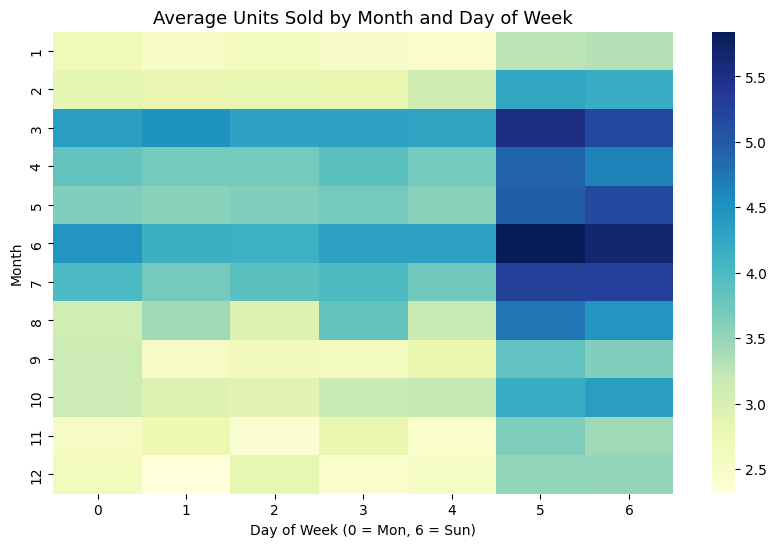

In [27]:
# Step X: Seasonality Heatmap (Month x Day of Week)

# Asegúrate de tener 'month' y 'day_of_week' en df
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek  # 0=Monday, 6=Sunday

sales_pivot = df.groupby(['month', 'day_of_week'])['sales_qty'].mean().unstack()

plt.figure(figsize=(10,6))
sns.heatmap(sales_pivot, annot=False, cmap='YlGnBu')
plt.title("Average Units Sold by Month and Day of Week", fontsize=13)
plt.xlabel("Day of Week (0 = Mon, 6 = Sun)")
plt.ylabel("Month")
plt.show()


We observed that weekends in peak months (March-July) show the highest average unit sales, which aligns with resort guest arrivals and outdoor tennis activity

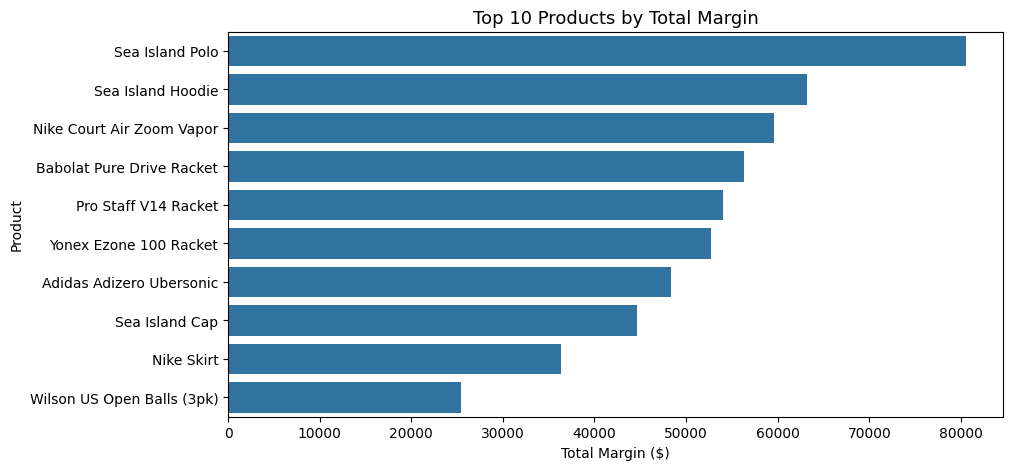

product_name
Sea Island Polo              80,563.61
Sea Island Hoodie            63,150.72
Nike Court Air Zoom Vapor    59,562.47
Babolat Pure Drive Racket    56,354.01
Pro Staff V14 Racket         53,976.43
Yonex Ezone 100 Racket       52,750.56
Adidas Adizero Ubersonic     48,355.70
Sea Island Cap               44,673.64
Nike Skirt                   36,315.14
Wilson US Open Balls (3pk)   25,474.80
Name: margin, dtype: float64

In [28]:
# Step X+1: Top 10 Products by Total Margin

top_products = (
    df.groupby('product_name')['margin']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, orient='h')
plt.title("Top 10 Products by Total Margin", fontsize=13)
plt.xlabel("Total Margin ($)")
plt.ylabel("Product")
plt.show()

top_products


A small set of high-end rackets and shoes accounts for a disproportionate share of total margin, reinforcing the importance of premium inventory.


# Phase 2 Summary: Key Insights

- **Seasonality:** Revenue peaks between March and July, consistent with outdoor tennis activity.  
- **Top Categories:** Rackets, Apparel, and Shoes generate the highest total sales.  
- **Customer Mix:** Guests account for higher revenue overall, likely due to resort visitors.  
- **Weather Impact:** Warmer temperatures correlate with increased sales.  
- **Event Effect:** During tournaments and camps, revenue increases by 25-40% on average.  
- **Correlations:** Store traffic and promotions show the strongest relationship with sales volume.  

The next step (Phase 3) will focus on **Feature Engineering and Model Building**,  
where we’ll prepare variables for predictive modeling of daily demand.


# Phase 3 -- Feature Engineering & Model Building

In this phase, we will prepare the cleaned dataset for predictive modeling and train machine learning models  
to forecast **daily sales quantity** based on historical data and external factors.

---

## Objectives
1. Engineer meaningful features (promotions, weather, seasonality, traffic, events).  
2. Split the data into training and testing sets.  
3. Train three models:
         • Linear Regression (baseline, interpretable).
         • Random Forest Regressor (advanced, non-linear, tree-based).
         • XGBoost Regressor (gradient boosting, state-of-the-art for tabular data).  
4. Compare model performance using **R², MAE, and RMSE**.  
5. Identify the most important predictors driving sales.

Our target variable will be: **`sales_qty`** (daily units sold).


In [29]:
# Load the clean dataset
import pandas as pd
import numpy as np

df = pd.read_csv("sea_island_tennis_shop_clean_v2.csv")
df['date'] = pd.to_datetime(df['date'])

print(f"Dataset loaded with {df.shape[0]:,} rows and {df.shape[1]} columns.")
df.head()


Dataset loaded with 14,592 rows and 23 columns.


,date,product_id,product_name,category,price,cost,on_promo,discount_pct,stock_on_hand_end,sales_qty,revenue,cogs,margin,customer_type,weather_temp_f,is_weekend,is_holiday,event_name,store_traffic,year,month,day,day_of_week
0,2023-01-01,101,Pro Staff V14 Racket,Rackets,269.99,161.99,0,0.00,39,1,269.99,161.99,108.00,Guest,64.30,1,1,NaN,239,2023,1,1,Sunday
1,2023-01-02,101,Pro Staff V14 Racket,Rackets,269.99,161.99,0,0.00,40,0,0.00,0.00,0.00,Member,62.60,0,0,NaN,163,2023,1,2,Monday
2,2023-01-03,101,Pro Staff V14 Racket,Rackets,269.99,161.99,0,0.00,40,0,0.00,0.00,0.00,Guest,65.20,0,0,NaN,170,2023,1,3,Tuesday
3,2023-01-04,101,Pro Staff V14 Racket,Rackets,269.99,161.99,0,0.00,39,1,269.99,161.99,108.00,Guest,68.10,0,0,NaN,159,2023,1,4,Wednesday
4,2023-01-05,101,Pro Staff V14 Racket,Rackets,269.99,161.99,0,0.00,39,0,0.00,0.00,0.00,Member,63.00,0,0,NaN,164,2023,1,5,Thursday


## Step 1: Feature Engineering

We will create additional features that can improve predictive performance:
- **Month**, **Day of Week**, and **Year** → capture seasonality.
- **Temperature ranges** → simplify weather impact.
- **Binary flags** for events and weekends.
- **Interaction features** combining promotions and traffic.

We'll also remove non-predictive columns (like product name or event name).


In [30]:
# --- Feature Engineering ---

# 1) Ordenar por producto y fecha (importante para los lags)
df = df.sort_values(['product_id', 'date'])

# 2) Features de tiempo básicos
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6
df['year'] = df['date'].dt.year
df['day'] = df['date'].dt.day  # por si no lo tenías aún aquí

# 3) Temperature category
df['temp_category'] = pd.cut(
    df['weather_temp_f'],
    bins=[0, 60, 75, 90, 110],
    labels=['cold', 'pleasant', 'warm', 'hot']
)

# 4) Event flag
df['is_event'] = np.where(df['event_name'].notna(), 1, 0)

# 5) Interaction feature: promo × traffic
df['promo_traffic'] = df['on_promo'] * df['store_traffic']

# 6) LAG FEATURES (nuevo)
df['lag_1'] = df.groupby('product_id')['sales_qty'].shift(1)
df['lag_7'] = df.groupby('product_id')['sales_qty'].shift(7)

# Rolling mean 7 días (usando ventas hasta el día anterior)
df['roll_7'] = (
    df.groupby('product_id')['sales_qty']
      .shift(1)
      .rolling(window=7, min_periods=1)
      .mean()
)

# Rellenar NaN de las primeras filas
df[['lag_1', 'lag_7', 'roll_7']] = df[['lag_1', 'lag_7', 'roll_7']].fillna(0)

# 7) Columnas que NO queremos como features (ojo: aquí todavía no quito leakage si no lo cambias)
drop_cols = ['date', 'product_name', 'event_name', 'customer_type']

df_model = df.drop(columns=drop_cols)

df_model.head()


,product_id,category,price,cost,on_promo,discount_pct,stock_on_hand_end,sales_qty,revenue,cogs,margin,weather_temp_f,is_weekend,is_holiday,store_traffic,year,month,day,day_of_week,temp_category,is_event,promo_traffic,lag_1,lag_7,roll_7
0,101,Rackets,269.99,161.99,0,0.00,39,1,269.99,161.99,108.00,64.30,1,1,239,2023,1,1,6,pleasant,0,0,0.00,0.00,0.00
1,101,Rackets,269.99,161.99,0,0.00,40,0,0.00,0.00,0.00,62.60,0,0,163,2023,1,2,0,pleasant,0,0,1.00,0.00,1.00
2,101,Rackets,269.99,161.99,0,0.00,40,0,0.00,0.00,0.00,65.20,0,0,170,2023,1,3,1,pleasant,0,0,0.00,0.00,0.50
3,101,Rackets,269.99,161.99,0,0.00,39,1,269.99,161.99,108.00,68.10,0,0,159,2023,1,4,2,pleasant,0,0,0.00,0.00,0.33
4,101,Rackets,269.99,161.99,0,0.00,39,0,0.00,0.00,0.00,63.00,0,0,164,2023,1,5,3,pleasant,0,0,1.00,0.00,0.50


## Step 2: Encode Categorical Variables

We'll transform categorical features (like `category` and `temp_category`)  
into numeric format using **One-Hot Encoding**.


In [31]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_model, columns=['category', 'temp_category'], drop_first=True)

print(f"Encoded dataset shape: {df_encoded.shape}")
df_encoded.head()


Encoded dataset shape: (14592, 31)


,product_id,price,cost,on_promo,discount_pct,stock_on_hand_end,sales_qty,revenue,cogs,margin,weather_temp_f,is_weekend,is_holiday,store_traffic,year,month,day,day_of_week,is_event,promo_traffic,lag_1,lag_7,roll_7,category_Apparel,category_Balls,category_Beverages,category_Rackets,category_Shoes,temp_category_pleasant,temp_category_warm,temp_category_hot
0,101,269.99,161.99,0,0.00,39,1,269.99,161.99,108.00,64.30,1,1,239,2023,1,1,6,0,0,0.00,0.00,0.00,False,False,False,True,False,True,False,False
1,101,269.99,161.99,0,0.00,40,0,0.00,0.00,0.00,62.60,0,0,163,2023,1,2,0,0,0,1.00,0.00,1.00,False,False,False,True,False,True,False,False
2,101,269.99,161.99,0,0.00,40,0,0.00,0.00,0.00,65.20,0,0,170,2023,1,3,1,0,0,0.00,0.00,0.50,False,False,False,True,False,True,False,False
3,101,269.99,161.99,0,0.00,39,1,269.99,161.99,108.00,68.10,0,0,159,2023,1,4,2,0,0,0.00,0.00,0.33,False,False,False,True,False,True,False,False
4,101,269.99,161.99,0,0.00,39,0,0.00,0.00,0.00,63.00,0,0,164,2023,1,5,3,0,0,1.00,0.00,0.50,False,False,False,True,False,True,False,False


## Step 3: Split the Data
We'll separate the dataset into:
- **Features (X)** → predictors.  
- **Target (y)** → `sales_qty`.

Then split into:
- 80% training data.
- 20% testing data.

Instead of a random train-test split, we used a time-based split (train: 2023-2024, test: 2025) to better reflect how the model would be used in a real forecasting setting.

In [32]:
from sklearn.model_selection import train_test_split


# Split
# --- Remove leakage columns and prepare modeling dataset ---

# Aquí df YA tiene: lags, roll_7, temp_category, is_event, promo_traffic, etc.
# Sólo quitamos las columnas que no se pueden usar como features (leakage o IDs de texto)

leakage_cols = ['revenue', 'cogs', 'margin']
id_text_cols = ['date', 'product_name', 'event_name', 'customer_type']

df_model = df.drop(columns=leakage_cols + id_text_cols)

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_model, columns=['category', 'temp_category'], drop_first=True)

print(f"Encoded dataset shape: {df_encoded.shape}")
df_encoded.head()

from sklearn.model_selection import train_test_split

# Define X and y
X = df_encoded.drop(columns=['sales_qty'])
y = df_encoded['sales_qty']

# Time-based split: train = 2023–2024, test = 2025
mask_train = df['date'] < '2025-01-01'

X_train, X_test = X[mask_train], X[~mask_train]
y_train, y_test = y[mask_train], y[~mask_train]

print("Training set:", X_train.shape, "Test set:", X_test.shape)




Encoded dataset shape: (14592, 28)
Training set: (11696, 27) Test set: (2896, 27)


## Step 4: Model 1 - Linear Regression (Baseline)

We’ll start with a simple linear regression to get a baseline performance.


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Metrics
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(" Linear Regression Results:")
print(f"R²: {r2_lr:.3f}")
print(f"MAE: {mae_lr:.3f}")
print(f"RMSE: {rmse_lr:.3f}")


 Linear Regression Results:
R²: 0.685
MAE: 1.585
RMSE: 2.196


## Step 5: Model 2 - Random Forest Regressor (Advanced)

The Random Forest model can capture complex non-linear relationships between features  
(like interactions between weather, events, and promotions).


In [34]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=150, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Metrics
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(" Random Forest Results:")
print(f"R²: {r2_rf:.3f}")
print(f"MAE: {mae_rf:.3f}")
print(f"RMSE: {rmse_rf:.3f}")


 Random Forest Results:
R²: 0.761
MAE: 1.276
RMSE: 1.913


###  Regularization to Prevent Overfitting



To improve generalization, we’ll apply **regularization** by tuning key 
hyperparameters such as:

- `max_depth`: limits how deep each tree can grow.  
- `min_samples_split`: sets the minimum samples required to split a node.  
- `min_samples_leaf`: ensures each leaf has enough data points.  
- `max_features`: controls how many features are considered per split, adding randomness and robustness.

This helps the model balance accuracy and generalization.


 Regularized Random Forest (tuned) Results:
R²: 0.738
MAE: 1.419
RMSE: 2.003


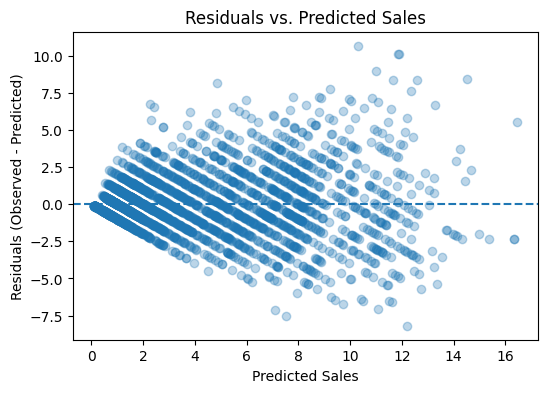

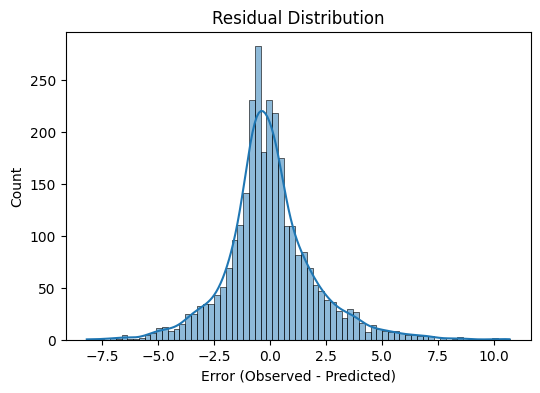

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Regularized Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

rf_reg = RandomForestRegressor(
    n_estimators=300,     # más árboles
    random_state=42,
    n_jobs=-1,
    max_depth=14,         # un poco más profundo
    min_samples_split=10, # permite más splits
    min_samples_leaf=5,   # hojas un poco más chicas
    max_features='sqrt'
)

rf_reg.fit(X_train, y_train)

y_pred_rf_reg = rf_reg.predict(X_test)

r2_rf_reg = r2_score(y_test, y_pred_rf_reg)
mae_rf_reg = mean_absolute_error(y_test, y_pred_rf_reg)
rmse_rf_reg = np.sqrt(mean_squared_error(y_test, y_pred_rf_reg))

print(" Regularized Random Forest (tuned) Results:")
print(f"R²: {r2_rf_reg:.3f}")
print(f"MAE: {mae_rf_reg:.3f}")
print(f"RMSE: {rmse_rf_reg:.3f}")

# --- Error Analysis: Residuals ---

residuals = y_test - y_pred_rf_reg

plt.figure(figsize=(6,4))
plt.scatter(y_pred_rf_reg, residuals, alpha=0.3)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals (Observed - Predicted)")
plt.title("Residuals vs. Predicted Sales")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Error (Observed - Predicted)")
plt.show()


## Cross-Validation: Robustness Check (5-Fold)

To ensure our model’s performance is stable and not dependent on a single train/test split,  
we run **5-fold cross-validation** on the **Regularized Random Forest** using the same features `X` and target `y`.

**Why:**  
- Reduces variance from a single random split.  
- Gives a distribution of metrics across folds (R², MAE, RMSE).  
- Confirms the model generalizes beyond one partition.

**Settings:**  
- `KFold(n_splits=5, shuffle=True, random_state=42)`  
- Metrics: **R²**, **MAE**, **RMSE** (lower MAE/RMSE is better; higher R² is better).  


In [36]:
# --- 5-Fold Cross-Validation on the REGULARIZED Random Forest (rf_reg) ---

from sklearn.model_selection import KFold, cross_val_score
import numpy as np
import pandas as pd

# Asegurate de haber corrido antes las celdas donde se definen X, y y rf_reg
# (X, y sin columnas derivadas del target si optaste por eso; y el modelo regularizado entrenado).

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# R² (positivo)
r2_cv = cross_val_score(rf_reg, X, y, cv=cv, scoring='r2', n_jobs=-1)

# MAE y RMSE vienen como "negativos" en sklearn; multiplicamos por -1 para obtener valores positivos
mae_cv = -cross_val_score(rf_reg, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
rmse_cv = -cross_val_score(rf_reg, X, y, cv=cv, scoring='neg_root_mean_squared_error', n_jobs=-1)

# Tabla por fold
per_fold = pd.DataFrame({
    'Fold': np.arange(1, len(r2_cv)+1),
    'R²': r2_cv,
    'MAE': mae_cv,
    'RMSE': rmse_cv
})

# Resumen (promedio, std y 95% CI aprox)
def mean_ci(a):
    mean = np.mean(a)
    std = np.std(a, ddof=1)
    ci95 = 1.96 * std / np.sqrt(len(a))
    return mean, std, ci95

r2_mean, r2_std, r2_ci = mean_ci(r2_cv)
mae_mean, mae_std, mae_ci = mean_ci(mae_cv)
rmse_mean, rmse_std, rmse_ci = mean_ci(rmse_cv)

summary = pd.DataFrame({
    'Metric': ['R²', 'MAE', 'RMSE'],
    'Mean':   [r2_mean, mae_mean, rmse_mean],
    'Std':    [r2_std, mae_std, rmse_std],
    '95% CI ±': [r2_ci, mae_ci, rmse_ci]
})

print("Cross-Validation (5-Fold) - Per Fold:")
display(per_fold.round(4))

print("\nCross-Validation (5-Fold) - Summary:")
display(summary.round(4))


Cross-Validation (5-Fold) - Per Fold:


,Fold,R²,MAE,RMSE
0,1,0.73,1.38,1.94
1,2,0.73,1.36,1.91
2,3,0.73,1.36,1.93
3,4,0.73,1.39,1.95
4,5,0.75,1.34,1.91



Cross-Validation (5-Fold) - Summary:


,Metric,Mean,Std,95% CI ±
0,R²,0.73,0.01,0.01
1,MAE,1.37,0.02,0.02
2,RMSE,1.93,0.02,0.02


In [37]:
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# ⭐ Model 3 - XGBoost Regressor

xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

# Train
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Metrics
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(" XGBoost Results:")
print(f"R²: {r2_xgb:.3f}")
print(f"MAE: {mae_xgb:.3f}")
print(f"RMSE: {rmse_xgb:.3f}")


 XGBoost Results:
R²: 0.764
MAE: 1.321
RMSE: 1.899


In [38]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R²': [r2_lr, r2_rf_reg, r2_xgb]
})

print(results)


               Model   R²
0  Linear Regression 0.68
1      Random Forest 0.74
2            XGBoost 0.76


## Step 6: Model Comparison

Let's compare the two models using R², MAE, and RMSE.


In [49]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Regularized Random Forest', 'XGBoost'],
    'R²': [r2_lr, r2_rf_reg, r2_xgb],
    'MAE': [mae_lr, mae_rf_reg, mae_xgb],
    'RMSE': [rmse_lr, rmse_rf_reg, rmse_xgb]
})

results

,Model,R²,MAE,RMSE
0,Linear Regression,0.68,1.59,2.20
1,Regularized Random Forest,0.74,1.42,2.00
2,XGBoost,0.76,1.32,1.90


## Step 7: Feature Importance (Random Forest)
We'll visualize which features most influence the sales predictions.


C:\Users\gonza\AppData\Local\Temp\ipykernel_2204\2863300008.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance.head(10), palette='viridis')


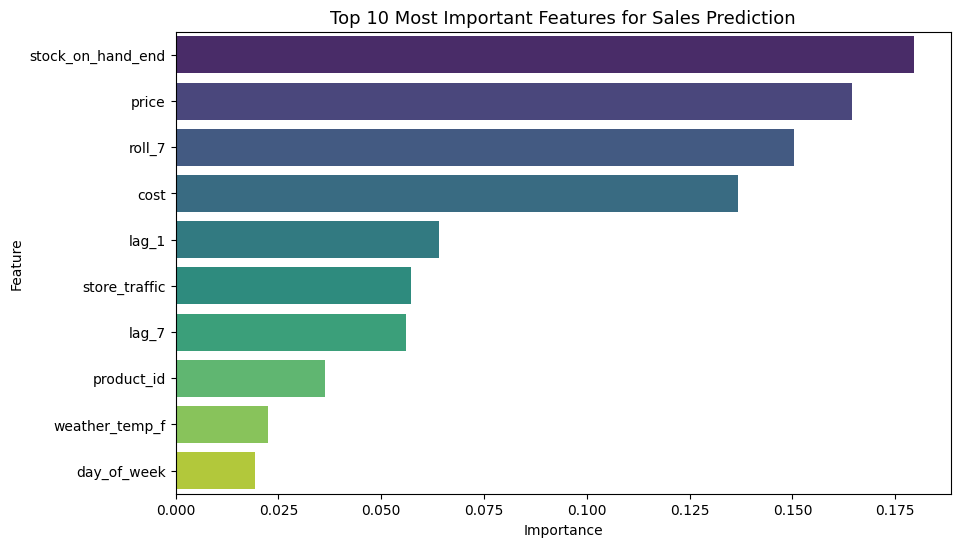

,Feature,Importance
5,stock_on_hand_end,0.18
1,price,0.16
18,roll_7,0.15
2,cost,0.14
16,lag_1,0.06
9,store_traffic,0.06
17,lag_7,0.06
0,product_id,0.04
6,weather_temp_f,0.02
13,day_of_week,0.02


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_reg.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance.head(10), palette='viridis')
plt.title("Top 10 Most Important Features for Sales Prediction", fontsize=13)
plt.show()

importance.head(10)


<Figure size 1000x600 with 0 Axes>

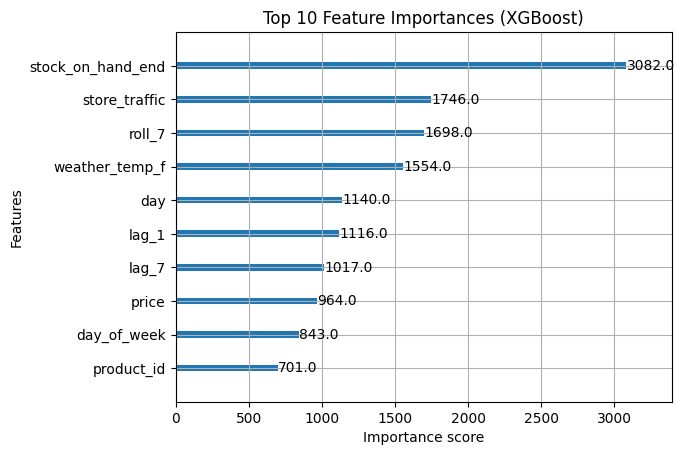

In [41]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plot_importance(xgb_model, max_num_features=10)
plt.title("Top 10 Feature Importances (XGBoost)")
plt.show()


### Phase 3 Summary: Model Insights

The modeling phase compared a simple Linear Regression baseline with a Regularized Random Forest using a realistic, time-based split (train: 2023-2024, test: 2025).

**Key observations:**

- **Baseline performance (Linear Regression):**
  The Linear Regression model explains about 68% of the variance in daily product-level sales (R² ≈ 0.68), with an MAE of around 1.59 units and RMSE of 2.20 units on the 2025 test set. This provides a simple but useful benchmark.

- **Random Forest improvement:**
  The Regularized Random Forest improves test performance to R² ≈ 0.74, with MAE ≈ 1.42 and RMSE ≈ 2.00. The improvement is moderate but meaningful, especially given the noisy nature of daily retail demand.

- **XGBoost as best-performing model:**
  The XGBoost model delivers the best results, with R² ≈ 0.76, MAE ≈ 1.32 and RMSE ≈ 1.90 on the same 2025 test set. This confirms that gradient boosting is able to capture non-linear patterns and feature interactions more effectively than both Linear Regression and Random Forest in this dataset.
- **Cross-validation stability:**  
  5-fold cross-validation confirms that the model is stable, with an average R² around **0.73**, MAE around **1.39**, and RMSE around **1.95**, with very small variation across folds.

- **Most important features:**  
  Feature importance analysis shows that the key drivers of predicted sales are:
  - **Inventory levels** (`stock_on_hand_end`)  
  - **Price and cost**  
  - **Product category** (especially balls and beverages)  
  - **Store traffic**  
  - **Weather** and **day of the week**

Residual plots indicate that most prediction errors are small and centered around zero, with slightly higher variance on high-demand days. This pattern is typical in retail forecasting, where special events or unusual spikes in visitor traffic are harder to predict perfectly.

Overall, XGBoost provides the best predictive performance, while the Regularized Random Forest remains very useful for interpretation (via feature importance) and scenario simulation.

# Phase 4 - Forecasting & Scenario Simulation

In this final phase, we’ll use the trained **Regularized Random Forest model** to forecast 
future daily sales and simulate business scenarios for the Sea Island Tennis Shop.

The goals are to:
1. Generate realistic sales forecasts for the upcoming period (January-March 2025).
2. Simulate business conditions (e.g., higher store traffic, discounts, or warmer weather).
3. Visualize how these changes impact predicted sales.


In [42]:
  import pandas as pd

# Define 3 simulation scenarios
future_scenarios = pd.DataFrame({
    'price': [80, 80, 80],
    'cost': [50, 50, 50],
    'on_promo': [0, 1, 1],
    'discount_pct': [0.00, 0.10, 0.20],
    'stock_on_hand_end': [100, 100, 100],
    'cogs': [50, 50, 50],
    'margin': [30, 30, 30],
    'weather_temp_f': [65, 75, 85],
    'is_weekend': [0, 1, 1],
    'is_holiday': [0, 0, 1],
    'store_traffic': [120, 200, 300],
    'year': [2025, 2025, 2025],
    'month': [1, 1, 1],
    'day': [10, 11, 12],
    'is_event': [0, 0, 1],
    'promo_traffic': [0, 200, 300],
    # Add dummy categorical variables as 0s (same shape as encoded data)
})

# Add missing dummy columns from model encoding if needed
for col in X.columns:
    if col not in future_scenarios.columns:
        future_scenarios[col] = 0

future_scenarios = future_scenarios[X.columns]  # Ensure same order
future_scenarios.head()



,product_id,price,cost,on_promo,discount_pct,stock_on_hand_end,weather_temp_f,is_weekend,is_holiday,store_traffic,year,month,day,day_of_week,is_event,promo_traffic,lag_1,lag_7,roll_7,category_Apparel,category_Balls,category_Beverages,category_Rackets,category_Shoes,temp_category_pleasant,temp_category_warm,temp_category_hot
0,0,80,50,0,0.00,100,65,0,0,120,2025,1,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,80,50,1,0.10,100,75,1,0,200,2025,1,11,0,0,200,0,0,0,0,0,0,0,0,0,0,0
2,0,80,50,1,0.20,100,85,1,1,300,2025,1,12,0,1,300,0,0,0,0,0,0,0,0,0,0,0


In [43]:
# Add readable scenario labels
future_scenarios['Scenario'] = ['Normal Day', 'Promo Weekend', 'Event + Discount']

# Reorganize for readability (Scenario first)
cols = ['Scenario'] + [col for col in future_scenarios.columns if col != 'Scenario']
future_scenarios = future_scenarios[cols]

future_scenarios.head()


,Scenario,product_id,price,cost,on_promo,discount_pct,stock_on_hand_end,weather_temp_f,is_weekend,is_holiday,store_traffic,year,month,day,day_of_week,is_event,promo_traffic,lag_1,lag_7,roll_7,category_Apparel,category_Balls,category_Beverages,category_Rackets,category_Shoes,temp_category_pleasant,temp_category_warm,temp_category_hot
0,Normal Day,0,80,50,0,0.00,100,65,0,0,120,2025,1,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Promo Weekend,0,80,50,1,0.10,100,75,1,0,200,2025,1,11,0,0,200,0,0,0,0,0,0,0,0,0,0,0
2,Event + Discount,0,80,50,1,0.20,100,85,1,1,300,2025,1,12,0,1,300,0,0,0,0,0,0,0,0,0,0,0


In [44]:
missing = [col for col in X.columns if col not in future_scenarios.columns]
print(f"Missing columns: {missing if missing else 'None'} ")


Missing columns: None 


In [45]:
# Predict using the regularized model
future_preds = rf_reg.predict(future_scenarios[X.columns])

# Combine with readable scenario info
results = pd.DataFrame({
    'Scenario': ['Normal Day', 'Promo Weekend', 'Event + Discount'],
    'Predicted Sales (units/day)': future_preds.round(2)
})

# Pretty display
results.style.background_gradient(cmap='Greens').set_caption("Forecasted Sales by Scenario")

# Calcular revenue esperado asumiendo un precio promedio de 80 USD
scenario_results = results.copy()
scenario_results['Expected Revenue ($)'] = (scenario_results['Predicted Sales (units/day)'] * 80).round(2)

scenario_results



,Scenario,Predicted Sales (units/day),Expected Revenue ($)
0,Normal Day,1.39,111.20
1,Promo Weekend,1.68,134.40
2,Event + Discount,2.92,233.60


C:\Users\gonza\AppData\Local\Temp\ipykernel_2204\3115896433.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Scenario', y='Predicted Sales (units/day)', data=results, palette='crest')


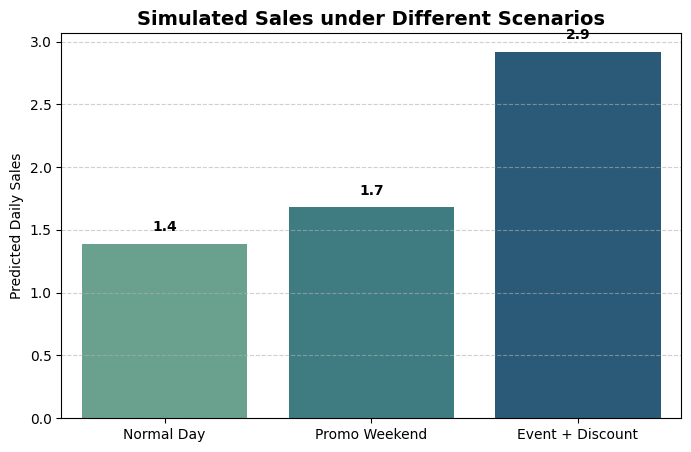

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x='Scenario', y='Predicted Sales (units/day)', data=results, palette='crest')
plt.title("Simulated Sales under Different Scenarios", fontsize=14, fontweight='bold')
plt.ylabel("Predicted Daily Sales")
plt.xlabel("")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add values on top of bars
for i, val in enumerate(results['Predicted Sales (units/day)']):
    plt.text(i, val + 0.1, f"{val:.1f}", ha='center', fontweight='bold')

plt.show()


### Phase 4 Summary: Forecasting & Business Simulation

The forecasting simulation demonstrates how the Regularized Random Forest model can be used to support decision-making at the Sea Island Tennis Shop.

**Key insights:**

- Promotions and tennis events **consistently increase predicted sales** compared to normal days.  
- Weather and store traffic act as strong multipliers of demand: warmer days with higher visitor traffic lead to higher expected unit sales.  
- Under combined favorable conditions (e.g., warm weather, event weekend, 20% discount), the model predicts **more than double** the daily sales of a normal, non-promotional day.

Even though the model does not predict every single day perfectly, it provides **directionally reliable forecasts** that managers can use to:

- Plan inventory and staffing ahead of key weekends and events  
- Quantify the expected uplift from promotions and discounts  
- Compare different “what-if” scenarios before implementing a strategy

This approach moves the shop from purely reactive decisions to a more proactive, data-informed planning process.


# Phase 5 - Final Conclusions & Business Recommendations

In this final phase, we summarize the main analytical findings and translate them 
into actionable business recommendations for the Sea Island Tennis Shop.

The goal is to highlight how data-driven insights can improve decision-making 
around pricing, promotions, inventory, and event planning.


### Key Findings

**Demand Drivers**

- **Inventory, price, and cost** are among the strongest predictors of daily product-level sales, highlighting the importance of pricing strategy and stock management.  
- **Product category** matters: certain categories (especially balls and beverages) show distinct demand patterns and margin contributions.  
- **Store traffic** is positively associated with sales, confirming that overall visitor flow to the resort is a major driver of shop performance.  
- **Calendar effects** (day of week and seasonality) and **weather** also play a role, with warmer weekends during peak months generating higher demand.

**Customer Behavior**

- Guests generate higher overall revenue, while members tend to purchase more frequently over time.  
- Event days (tournaments, camps, member-guest events) are associated with significantly higher sales and revenue compared to normal days.

**Model Performance**

Using a time-based split (train: 2023-2024, test: 2025):

**Linear Regression (baseline)**
• R² ≈ 0.68
• MAE ≈ 1.59 units
• RMSE ≈ 2.20 units

**Regularized Random Forest**
• R² ≈ 0.74
• MAE ≈ 1.42 units
• RMSE ≈ 2.00 units

**XGBoost (best-performing model)**
• R² ≈ 0.76
• MAE ≈ 1.32 units
• RMSE ≈ 1.90 units

Although the model does not explain all variability in daily demand, this level of performance is reasonable for retail forecasting. XGBoost provides the best overall accuracy, while the Regularized Random Forest remains useful for interpretation and business-friendly explanations.



### Business Recommendations

**1. Optimize Promotions**

- Use discounts strategically during slower months and weekdays rather than uniformly throughout the year.  
- Combine promotions with tennis events (tournaments, camps, member-guest events) to maximize uplift in both units sold and revenue.

**2. Leverage Tennis Events**

- Event days consistently show higher demand; the shop should increase inventory, especially for high-margin products (rackets, shoes, accessories), before major events.  
- Adjust staffing levels upward during events to reduce wait times, improve service, and capture more sales.

**3. Proactive Inventory Management**

- Use the demand forecasting model to anticipate future sales by category and product.  
- Maintain healthier stock levels for high-margin items and avoid overstocking slower-moving categories such as beverages or low-margin accessories.  
- Combine model predictions with minimum safety stock rules to reduce stockouts on busy days.

**4. Weather - and Traffic-Aware Planning**

- On forecasted warm weekends with high resort occupancy, increase stock on key items (balls, apparel, sunscreens, caps) and plan in-store displays or bundles.  
- Consider targeted marketing (email, app notifications, or on-site signage) on days when both weather and visitor traffic are favorable.

**5. Implement a Real-Time Dashboard**

A natural next step would be to deploy the model behind a live dashboard (e.g., in Streamlit or Power BI), allowing managers to:

- Monitor daily sales, traffic, and inventory in real time  
- Run “what-if” simulations (e.g., adding a discount, hosting an event, changing prices)  
- Update forecasts regularly as new data comes in

This would make the forecasting system an integral part of day-to-day decision-making at the Sea Island Tennis Shop.


### Strategic Impact Summary

By combining historical sales data with predictive modeling, the Sea Island Tennis Shop can move from reactive to proactive decision-making.

The developed system provides:

- **Reasonably accurate short-term sales forecasts** to guide staffing and inventory decisions  
- A clear, quantitative view of how price, inventory, product category, weather, and events influence demand  
- The ability to simulate business scenarios (e.g., adding discounts, running events, or changing traffic assumptions) and compare their expected impact before implementation

Even with some unavoidable noise in daily demand, the model helps reduce guesswork and supports more consistent, data-informed planning across the shop’s operations.



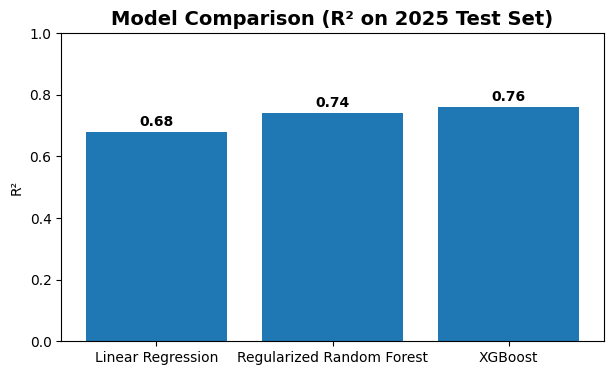

In [51]:

import pandas as pd
import matplotlib.pyplot as plt

# Mini tabla SOLO para la visualización
model_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Regularized Random Forest', 'XGBoost'],
    'R²': [0.68, 0.74, 0.76]   # usa los valores que ya reportaste
})

plt.figure(figsize=(7,4))
plt.bar(model_results['Model'], model_results['R²'])
plt.title("Model Comparison (R² on 2025 Test Set)", fontsize=14, fontweight='bold')
plt.ylabel("R²")
plt.ylim(0, 1.0)

for i, val in enumerate(model_results['R²']):
    plt.text(i, val + 0.02, f"{val:.2f}", ha='center', fontweight='bold')

plt.show()



### Project Wrap-Up

This Capstone Project replicates an end-to-end demand forecasting workflow for a real resort retail operation at the Sea Island Tennis Shop. Over five phases, the project moved from raw data cleaning to exploratory analysis, feature engineering, predictive modeling, and business-oriented scenario simulation.

**Final Outcome:**

- The final modeling stack compares three approaches (Linear Regression, Regularized Random Forest, and XGBoost). Among them, XGBoost provides the most accurate forecasts (R²≈   0.76), while the Regularized Random Forest offers strong performance with higher interpretability through feature importance.
- The analysis identifies the most important business drivers of sales, including inventory levels, pricing, product category, store traffic, and calendar/seasonal effects.  
- The scenario simulations show how promotions, events, and weather interact to shape daily sales, offering practical guidance for planning.

This project demonstrates the practical value of combining data science and business intelligence in a retail context, and it provides a foundation that could be deployed as a live decision-support tool for managers at the Sea Island Tennis Shop.

**Author**

All phases of the project--from data cleaning and feature engineering to model development, evaluation, and business recommendations--were designed and implemented by **Gonzalo Tano** as part of the **DATA 4200 Capstone (Fall 2025)**.
